# Credit Card Fraud Detection
## Problem framing
The end goal of this task is to develop a model capable of predicting fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Analyzed dataset
The dataset *Credit Card Fraud Detection* publicly available at Kaggle.com (https://www.kaggle.com/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, including 492 frauds out of 284,807 transactions. 

Data contain principal components V1, V2, ..., V28 obtained with PCA. The only features which have not been transformed with PCA are *'Time'* (the seconds elapsed between each transaction and the first transaction in the dataset) and *'Amount'* (the amount of transaction). *'Class'* is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('creditcard.csv')

## Exploratory data analysis
### Basic info about the data set

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking if we have any NaN values to deal with
data.isna().values.any()

False

In [7]:
# Counting the transaction classified to given class (0=normal, 1=fraud)
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#Finding info about maximum transaction
data[data['Amount']==data['Amount'].max()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,...,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0


In [9]:
print("Sum of all transactions: %.1f" % data['Amount'].sum())

Sum of all transactions: 25162590.0


In [10]:
#Finding minimum transaction
#data[(data['Amount']==data['Amount'].min())][['Amount','Class']]
data[(data['Amount']==data['Amount'].min()) & (data['Class']==1)][['Amount','Class']].count()

Amount    27
Class     27
dtype: int64

In [11]:
data[['Time','Amount','Class']].groupby('Class').describe().transpose()

Class                     0              1
Time   count  284315.000000     492.000000
       mean    94838.202258   80746.806911
       std     47484.015786   47835.365138
       min         0.000000     406.000000
       25%     54230.000000   41241.500000
       50%     84711.000000   75568.500000
       75%    139333.000000  128483.000000
       max    172792.000000  170348.000000
Amount count  284315.000000     492.000000
       mean       88.291022     122.211321
       std       250.105092     256.683288
       min         0.000000       0.000000
       25%         5.650000       1.000000
       50%        22.000000       9.250000
       75%        77.050000     105.890000
       max     25691.160000    2125.870000

### Short summary of the basic info:
<ul>
  <li> There are 28 principal components obtained with PCA. We do not know their meaning as it is not described in the data set introduction. This means it will be hard to interpret them. We should also remember that data were probably scaled to do PCA.</li>
  <li> There are no "Null" values - no need to work on this. </li>
  <li> Relatively small average amount of transaction (88\$). Sum of all transactions were slightly more than 2.5 mln\$. </li>
  <li> Maximum transaction had the value of 25 691\$, and was classified as a normal transaction.</li>
  <li> The mean value of fraud transations was 122\$, while maximum was 2126\$. </li>
  <li> Fraud transactions occured 492 times of 284807 transactions, what gives only 0.17%. </li>
  <li> 1825 transaction of 0.00\$, 27 of them classified as fraud (1.5%). I do not know if it is possible and how to explain it with a given information about the data set. The only idea is that these transactions were done to authorize identity of the card holder. In this case, fraud would mean that someone stolen the personal data and account details. </li>
</ul>

### Data vizualizations

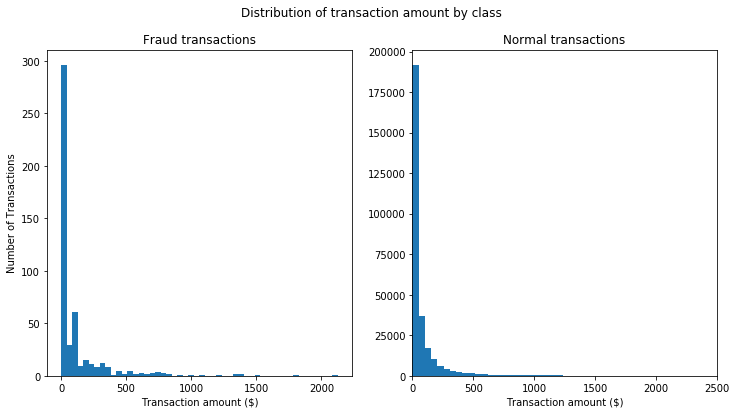

In [12]:
# Distributions of Time and Amount
fraud = data[data['Class']==1]
proper = data[data['Class']==0]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,6))
fig.suptitle('Distribution of transaction amount by class')
bins = 50
ax1.hist(fraud['Amount'], bins = bins)
ax1.set_title('Fraud transactions')
ax2.hist(proper['Amount'], bins = 500)
ax2.set_title('Normal transactions')
ax1.set_ylabel('Number of Transactions')
ax1.set_xlabel('Transaction amount ($)')
ax2.set_xlabel('Transaction amount ($)')
ax2.set_xlim((0, 2500))
plt.show();

fig.tight_layout()

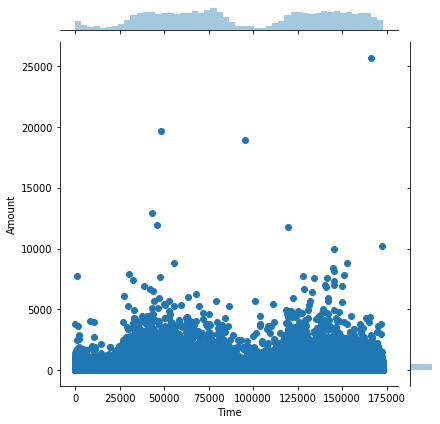

In [13]:
sns.jointplot(x='Time', y='Amount', data=data, ratio=10, height=6, space=0.5)

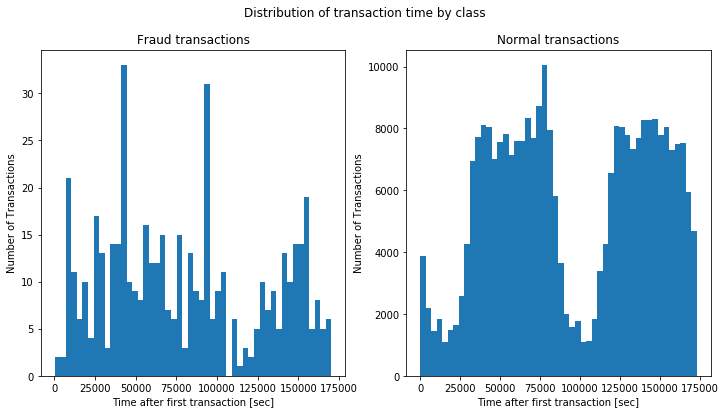

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(12,6))
fig.suptitle('Distribution of transaction time by class')
bins = 50
ax1.hist(fraud['Time'], bins = bins)
ax1.set_title('Fraud transactions')
ax2.hist(proper['Time'], bins = bins)
ax2.set_title('Normal transactions')
ax1.set_ylabel('Number of Transactions')
ax1.set_xlabel('Time after first transaction [sec]')
ax2.set_ylabel('Number of Transactions')
ax2.set_xlabel('Time after first transaction [sec]')
#ax2.set_xlim((0, 5000))
plt.show();

fig.tight_layout()

In [15]:
# Characteristics of fraud peak -> check the amounts of fraud transactions during the peak time for frauds and how often are the same
peak_fraud = data[(data['Time']>93500) & (data['Time']<94500) & (data['Class']==1)][['Amount','Class']]
peak_fraud.groupby('Amount').count().transpose()

Amount,0.01,1.0,8.54,11.4,30.31,37.93,44.9,45.48,75.86,78.0,97.0,104.03,188.52,209.65,316.06
Class,1,8,1,1,2,1,2,1,1,2,1,2,2,1,2


### Checking the characteristics and common amounts for frauds

In [16]:
fraud.groupby('Amount').count().sort_values('Time', ascending=False).head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Amount,,,,,,,,,,,,,,,,,,,,,
1.00,113,113,113,113,113,113,113,113,113,113,...,113,113,113,113,113,113,113,113,113,113
0.00,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
99.99,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
0.76,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
0.77,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
0.01,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2.00,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3.79,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
0.68,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


### Summary
<ul>
  <li> Data show high inbalance in classes (fraud/normal transaction). </li>
  <li> Majority of the transactions are done for low amounts. Both distributions (fraud/normal transactions) are skewed, distribution for normal transactions is slightly more evenly distributed. </li>
  <li> Time of normal transactions is more evenly distributed with a recognizible drop in number of transaction in day-night pattern. </li>
  <li> Time of fraud transactions does not show so strong distribution, and shows few main peaks. It may suggest that e.g. fraud transactions are done one after each other in short period of time by the same people or different people in the same area. But we cannot check it with a given data set - this info is probably hidden in V features. </li>
  <li> In short period of time (checked sample) there were few double transactions with the same amount - it may suggest e.g. charging twice for the same transaction. </li>
  <li> The most common fraud amount is 1\$. Majority of the most common amounts are small - it is probably quite effective way to cheat, beacuse people (card holders) do not tend to check small transactions. </li>
  <li> Other common transaction is 99.99\$ - it suggests subliminal value. Some additional authorization (such as PIN number) may be required from 100\$.</li>
  
</ul>

## Creating sub-samples


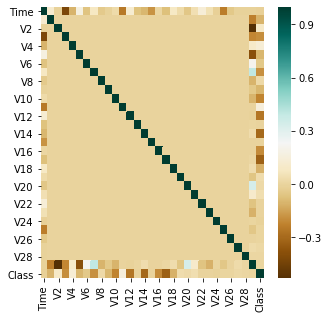

In [17]:
# Checking the correlations for a whole data set
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=False, cmap='BrBG')

### Comment
The data in a given format do not provide usefull information. Let's try to do something with it.
<ul>
  <li> Columns 'Time' and 'Amount' are not scaled, while other features had to be scaled to perform PCA. I will use StandardScaler to scale mentioned data. </li>
  <li> Such inbalance in data classified to each class leads to problems with proper fraud detection. I will prepare sub-sample. There are three (two) main methods to deal with imbalanced data sets: ignoring the problem (not the best solution - model will always classify to a major class), under-sampling the majority class or over-sampling minority class. For a purpose of this task, I will start with under-sampling method. This gives a high risk of loosing information (492 randomly chosen normal transactions gives only 0.17% of all available normal transactions). </li>
  <li> First try is to create a new dataframe consisting of the same amount of fraud and normal transactions (there are 492 fraud transactions, so the same amount of normal transaction will be randomly chosen to a new sub-sample).</li>
  <li> The model will be tested on the original dataset to check the real performance of the chosen methods.</li>
</ul>

In [18]:
# Scale the data usinng Standard Scaler
standard_scaler = StandardScaler()
data['Scaled_time'] = standard_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data['Scaled_amount'] = standard_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
scaled_data = data.drop(['Time', 'Amount'], axis=1)

In [19]:
scaled_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_time,Scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


In [20]:
# Shuffle the data
scaled_data = scaled_data.sample(frac=1).reset_index(drop=True)
scaled_data.head()

# Choosing 492 transactions from normal transactions
df_normal_trans = scaled_data[scaled_data['Class']==0].sample(n=492).reset_index(drop=True)
df_frauds = scaled_data[scaled_data['Class']==1]

# A new sub-sample (50/50 fraud/normal transactions)
equal_subsample = pd.concat([df_normal_trans, df_frauds], sort=False)
equal_subsample = equal_subsample.sample(frac=1).reset_index(drop=True)

In [21]:
equal_subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_time,Scaled_amount
0,0.523820,1.531708,-4.176390,3.584615,-1.023954,-0.502471,-1.891966,0.878417,-1.541942,-2.649406,...,1.176927,0.453553,0.485211,-0.500687,-0.108284,0.269477,-0.063245,1,0.824294,0.167361
1,1.216467,0.246862,0.546676,0.498675,-0.361296,-0.650658,0.006609,-0.097661,-0.318687,0.082599,...,-0.576370,0.114897,0.342972,0.210518,0.074848,-0.028533,0.010438,0,-0.326963,-0.342914
2,1.743438,-0.564841,-0.910878,1.535844,-0.148165,0.180577,-0.094476,0.115737,1.048005,0.145658,...,-0.653537,0.107777,-0.525191,-0.007704,-0.815360,0.012245,-0.043670,0,0.534895,0.062572
3,-0.983171,0.632579,2.018805,1.091419,-0.641190,0.864609,-0.254131,0.928432,0.254458,-0.923359,...,-0.312448,0.105732,0.202162,-0.350510,-0.622131,0.078419,0.072358,0,-0.809590,-0.217294
4,-15.271362,8.326581,-22.338591,11.885313,-8.721334,-2.324307,-16.196419,0.512882,-6.333685,-13.175198,...,1.068019,1.085617,-1.039797,-0.182006,0.649921,2.149247,-1.406811,1,-1.568433,-0.349231
5,-1.265046,1.067887,0.532347,-1.430624,1.344849,0.783726,0.648806,0.735868,-0.985442,-1.364403,...,1.153935,-0.587465,-1.294262,0.953597,0.026189,-0.080118,-0.063806,0,1.496484,-0.350071
6,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,-3.541780,-5.334754,...,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,1,1.383993,-0.334478
7,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,-7.864506,...,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,1,-0.803652,-0.323164
8,-6.750509,5.367416,-10.054635,9.064478,-7.968118,-2.263798,-10.317566,4.237666,-5.324109,-11.092392,...,-0.348740,0.425001,0.674909,-0.784208,-0.247422,1.159581,0.197818,1,-0.020171,0.484969
9,-2.161655,0.947915,1.612149,-1.539828,-2.131347,0.316346,-2.253441,-1.519953,-1.244028,-0.873247,...,0.927217,-0.098970,0.518826,0.203422,-0.346207,-0.451116,-0.057478,0,-0.443687,-0.164120


Text(0.5, 1.0, 'Equal number of fraud/normal transactions')

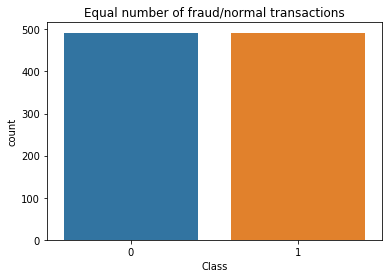

In [22]:
# Distributions of classes in the new subsample
sns.countplot(x='Class', data=equal_subsample)
plt.title('Equal number of fraud/normal transactions')

### Correlations

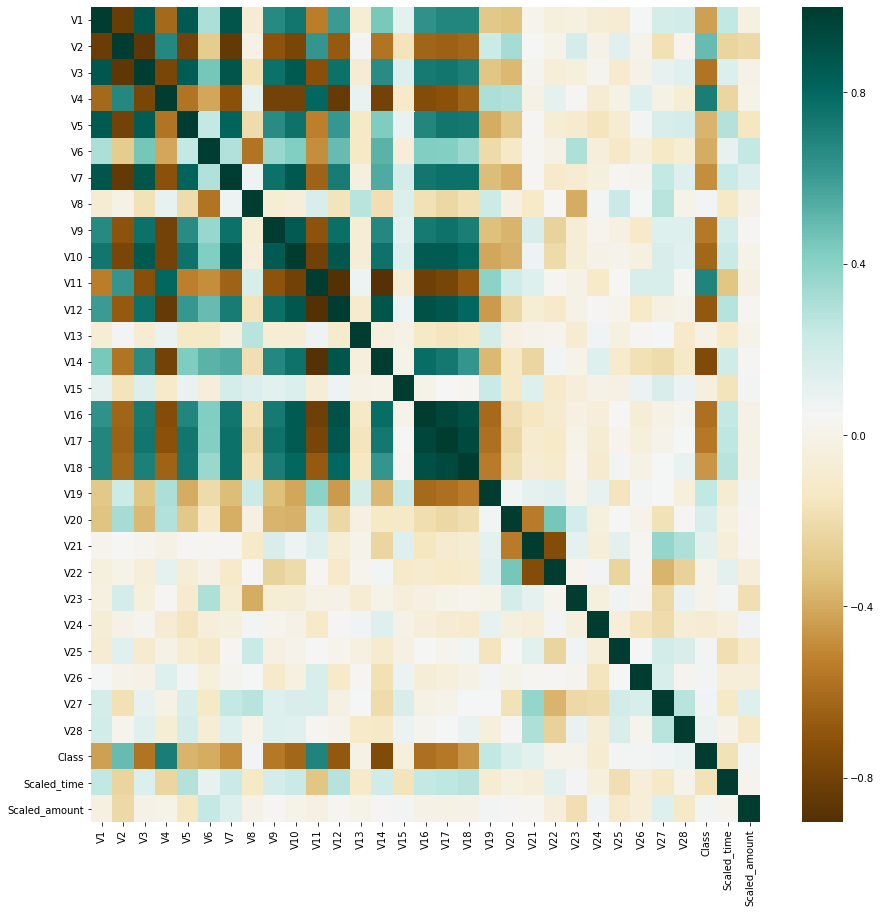

In [23]:
# Checking the correlations for the new data set
plt.figure(figsize=(15,15))
sns.heatmap(equal_subsample.corr(),annot=False, cmap='BrBG')
#equal_subsample.corr().iplot(kind='heatmap', colorscale='BrBG')

### Short comment
There are few components that most effectively correlates to the class: positive correlations (V4, V11, and V2), and negative correlations (V14, V12, V10, V16, V17, V9, V3). Correlations between components V1-V28 are quite complex.

# Model selection
I will start with one of the common model - **Logistic Regression**. The next step should be to compare different models, e.g.:
<ul>
    <li> K-Nearest Neighbors </li>
    <li> Support vector classifier </li>
    <li> Random forest </li>
</ul>
A goal is to choose the model with the best performance.

In [24]:
# Import tested classifiers
from sklearn.linear_model import LogisticRegression

# Other libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Split the data into training and test sets
X = equal_subsample.drop('Class', axis=1)
y = equal_subsample['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Logistic regression

In [26]:
#Classifiers
LogModel = LogisticRegression()

In [27]:
LogModel.fit(X_train, y_train)
LR_train_score = cross_val_score(LogModel, X_train, y_train)
print('Logistic Regression has a training score of %.2f' % LR_train_score.mean())
Log_predict = LogModel.predict(X_test)

Logistic Regression has a training score of 0.93


In [28]:
print(confusion_matrix(y_test, Log_predict))
print('\n')
print(classification_report(y_test, Log_predict))

[[ 84   1]
 [  5 107]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.99      0.96      0.97       112

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



In [29]:
# Choose the optimal parameters for Logistic Regression
#pipe = Pipeline([('classifier' , LogisticRegression())])
param_grid = {'penalty' : ['l1', 'l2'],
     'C' : [0.001,0.01, 0.1,1,10,100]}

grid_LR = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 5, verbose=True)
grid_LR.fit(X_train, y_train)
best_LR= grid_LR.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


In [38]:
LR_predict = best_LR.predict(X_test)
print(confusion_matrix(y_test, LR_predict))
print('\n')
print(classification_report(y_test, LR_predict))
print('\n')
print('There is no noticeable difference between this solution and the one taking default parameters')

[[ 84   1]
 [  5 107]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.99      0.96      0.97       112

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197



There is no noticeable difference between this solution and the one taking default parameters


## Comment on metric selection
Positive class is much smaller than the negative class in this dataset. The main goal is to detect positive samples - this is why precision and recall should give good information.

**Precision = TP/(TP+FP)** measures the probability of samples classified as positive to be actually positive

**Recall = TP/(TP+FN)** identifies detected positives to all positives in the sample

**Accuracy = (TP+TN)/total** will not be used for this case due to very high number of true negatives in the data set. 

Both *Precision* and *Recall* do not use true negative values, what is important for this data set. In the analyzed case, more important is to detect fraudulent transactions, even if some of them will turn out to be normal after checking. Thus, I will mainly focus on *Recall*. We should remember that increasing recall will probably reduce precision.  

Good idea would be to use **AUPRC** (the Area Under the Precision-Recall Curve) and this should be tested as the next step to improve the process.

### Comment on spliting the data
The aim is to test the model on real data set, instead of using prepared data sets with equal number of fraud/normal transactions

In [41]:
from sklearn.model_selection import StratifiedKFold

X = scaled_data.drop('Class', axis=1)
y = scaled_data['Class']

# The folds in stratified K Fold  are made by preserving the percentage of samples for each class
strat_split = StratifiedKFold(n_splits = 5, random_state=None, shuffle=False)
for train_ix, test_ix in strat_split.split(X,y):
    real_X_train, real_X_test = X.iloc[train_ix], X.iloc[test_ix]
    real_y_train, real_y_test = y.iloc[train_ix], y.iloc[test_ix]
    
print('Real Split Distribution - number of train values: ', real_y_train.value_counts())
print('Real Split Distribution - train values [%]: ', real_y_train.value_counts()/len(real_y_train)*100)
print('\n')
print('Real Split Distribution - number of test values: ', real_y_test.value_counts())
print('Real Split Distribution - test values [%]: ', real_y_test.value_counts()/len(real_y_test)*100)

Real Split Distribution - number of train values:  0    227452
1       394
Name: Class, dtype: int64
Real Split Distribution - train values [%]:  0    99.827076
1     0.172924
Name: Class, dtype: float64


Real Split Distribution - number of test values:  0    56863
1       98
Name: Class, dtype: int64
Real Split Distribution - test values [%]:  0    99.827952
1     0.172048
Name: Class, dtype: float64


In [42]:
# Real data predictions
LR_real_predict = best_LR.predict(real_X_test)
print(confusion_matrix(real_y_test, LR_real_predict))
print('\n')
print(classification_report(real_y_test, LR_real_predict))

[[54732  2131]
 [    5    93]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.95      0.08        98

    accuracy                           0.96     56961
   macro avg       0.52      0.96      0.53     56961
weighted avg       1.00      0.96      0.98     56961



### Comment on the result
Again, first thing to notice is high inbalance between predicted classes. As explained before, this script focuses on proper detection of *class 1*. The trained model detected 93 out of 98 fraud transactions, what gives *recall* value of 0.95. Unfortunately, another 2131 transactions were incorrectly marked as a fraud. This gives the *precision* value of only 0.04. Next focus should be put on decreasing this number, without increasing recall, or even better improving both recall and precision. First thing to do should be trying to understand the problem - which transactions are classified incorrectly and why? Think about possible solutions and choose first steps to conduct, e.g.:
<ul>
    <li> try different classification methods and choose the best one. </li>
    <li> try over-sampling (e.g. with SMOTE) instead of under-sampling if problem comes from the reduced amount of data. The other option would be to choose multiple under-samples and repeat the process in the loop.</li>
    <li> try different ways of splitting the data </li>
    <li> try to understand analyzed features and think if we rely on proper features. </li>
    <li> try to detect anomalies and remove outliers from the features that are highly correlated with the class. Be careful to the amount of omitted data. </li>
    <li> think about different classification metrics </li>
    <li> try different scaling methods </li>
</ul>    